In [ ]:
!pip install Pipeline

# Home credit

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,roc_curve, auc,precision_recall_curve,f1_score,balanced_accuracy_score

In [ ]:
train_path = "/mnt/01D6B57CFBE4DB20/1.Linux/Data/home-credit-default-risk/application_train.csv"
test_path = "/mnt/01D6B57CFBE4DB20/1.Linux/Data/home-credit-default-risk/application_test.csv"
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
# Learn label encoder
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
print(le)
print(list(le.classes_))

print(le.transform(["tokyo", "tokyo", "paris"]))

print(list(le.inverse_transform([2, 2, 1])))

LabelEncoder()
['amsterdam', 'paris', 'tokyo']
[2 2 1]
['tokyo', 'tokyo', 'paris']


In [ ]:
#train["NAME_CONTRACT_TYPE"]=LabelEncoder().fit_transform(train["NAME_CONTRACT_TYPE"])
#train["NAME_CONTRACT_TYPE"]

0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: int64

In [ ]:
train["NAME_CONTRACT_TYPE"].values

array(['Cash loans', 'Cash loans', 'Revolving loans', ..., 'Cash loans',
       'Cash loans', 'Cash loans'], dtype=object)

In [ ]:
a=str(train["NAME_CONTRACT_TYPE"].values)
a

"['Cash loans' 'Cash loans' 'Revolving loans' ... 'Cash loans' 'Cash loans'\n 'Cash loans']"

In [ ]:
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
for feature in categorical_features:
    #train[feature]=pd.Categorical(train[feature])
    train[feature]=str(train[feature].values)
    train[feature]=LabelEncoder().fit_transform(train[feature])


In [ ]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,0,0,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,0,0,0,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,0,0,0,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,0,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
dataX = train.drop(['TARGET'],axis=1)
dataY = train['TARGET']

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.30, \
                    random_state=2018, stratify=dataY)

In [ ]:
#Standard scaler all numeric value
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

#One hot encoder all category value
categorical_transformer = Pipeline(steps=[('onehot', OrdinalEncoder())])
categorical_features = X_train.select_dtypes(include=['object']).columns

transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categorical_transformer, categorical_features),
    #('numeric', numeric_transformer, selector(dtype_exclude="object")),
    #('categoric', categorical_transformer, selector(dtype_include="object")),
    #('imputer', imputer_transformer, numeric_features),
]
preprocessor = ColumnTransformer(transformers)

In [ ]:
# Create transform X value
X_train_tran = preprocessor.fit_transform(X_train)
X_test_tran=preprocessor.transform(X_test)

In [ ]:
start=time.time()
xgb=XGBClassifier(
                nthread=16,
                objective='binary:logistic',
                eval_metric = 'logloss',
                #scale_pos_weight=1,
                enable_categorical=True,
                seed=2018,
                verbosity=1    
                              )
xgb.fit(X_train, y_train)
end=time.time()
print("time: ",end-start) # 95 s compare with 108 s h2o r
y_pred=xgb.predict(X_test)
y_pred_probs=xgb.predict_proba(X_test)
print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))

/home/dnn/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:21:54] WARNING: ../src/learner.cc:541: 
Parameters: { enable_categorical } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


95.6757915019989
f1 score 0.04768583450210379
balanced_accuracy_score: 0.5113273773669774
classification_report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.47      0.03      0.05      7448

    accuracy                           0.92     92254
   macro avg       0.70      0.51      0.50     92254
weighted avg       0.88      0.92      0.88     92254



In [ ]:
start=time.time()
lgbm=LGBMClassifier(
    n_estimators = 200,
    boosting_type = 'gbdt',
    objective = 'binary',
    metric= 'binary:logloss',
    metric_freq=50,
    learning_rate=0.01,
    max_depth=4,
    num_leaves= 16, #(2^maxdepth)
    min_data_in_leaf=2000,
    scale_pos_weight=1,
    num_threads=16,
    random_state =500,
    bagging_freq=0,
                                )

lgbm.fit(X_train, y_train)
end=time.time() 
print("time: ",end-start) # 9s vs 33 s H2o light gbm

y_pred=lgbm.predict(X_test)
y_pred_probs=lgbm.predict_proba(X_test)

print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))


[LightGBM] [Warning] num_threads is set=16, n_jobs=-1 will be ignored. Current value: num_threads=16
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
time:  11.51891303062439
f1 score 0.0
balanced_accuracy_score: 0.5
classification_report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



In [ ]:
start=time.time()
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#    max_depth=1, random_state=0).fit(X_train, y_train)
clf = RandomForestClassifier().fit(X_train, y_train)
end=time.time() 
print("time: ",end-start)
y_pred=clf.predict(X_test)
print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))


# Credit card

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,roc_curve, auc,precision_recall_curve,f1_score,balanced_accuracy_score

In [ ]:
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(file)

dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX =StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.20, \
                    random_state=2018, stratify=dataY)

In [ ]:
start=time.time()
xgb=XGBClassifier(
                nthread=16,
                objective='binary:logistic',
                eval_metric = 'logloss',
                #scale_pos_weight=1,
                seed=2018,
                verbosity=1    
                              )
xgb.fit(X_train, y_train)
end=time.time() 
print("time: ",end-start) # 89 s compare with 45 s h2o r

y_pred=xgb.predict(X_test)

print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))

/home/dnn/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


time:  89.60068416595459
f1 score 0.88268156424581
balanced_accuracy_score: 0.9030436386710001
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
start=time.time()
lgbm=LGBMClassifier(
    num_threads=16,
    #n_estimators = 200,
    #boosting_type = 'gbdt',
    #objective = 'binary',
    #metric= 'binary:logloss',
    #metric_freq=50,
    #learning_rate=0.01,
    #max_depth=4,
    #num_leaves= 16, #(2^maxdepth)
    #min_data_in_leaf=2000,
    #scale_pos_weight=1,
    #num_threads=16,
    #random_state =500,
    #bagging_freq=0,
                                )
lgbm.fit(X_train, y_train)
end=time.time() # 4.7 s compare with 7 s h2o r
print("time: ",end-start)

y_pred=lgbm.predict(X_test)
print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))

[LightGBM] [Warning] num_threads is set=16, n_jobs=-1 will be ignored. Current value: num_threads=16
time:  4.736140489578247
f1 score 0.6285714285714286
balanced_accuracy_score: 0.8363302200452494
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.59      0.67      0.63        98

    accuracy                           1.00     56962
   macro avg       0.79      0.84      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
start=time.time()
#clf = GradientBoostingClassifier(n_jobs=-1).fit(X_train, y_train)
clf = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train) # 100 tree
end=time.time() 
print("time: ",end-start) # 128 s compare with 81 s h2o r
y_pred=clf.predict(X_test)
print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))

time:  128.91356110572815
f1 score 0.8777777777777778
balanced_accuracy_score: 0.9030348457616023
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



# Light gbm

In [23]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [24]:
# define dataset
X, y = get_dataset()
print(X.shape)
X

(1000, 20)


array([[ 0.2929949 , -4.21223056, -1.288332  , ..., -4.43170633,
        -2.82646737,  0.44916808],
       [-0.06839901,  5.51884147, 11.2389773 , ..., -3.08994781,
         1.19029898,  1.62025622],
       [ 0.73161622, -0.68468633, -0.98174194, ...,  5.65429655,
        -0.64659866, -3.15652999],
       ...,
       [ 0.81230832,  0.29333773,  3.55727154, ...,  7.52278375,
        -4.50067701, -1.92525878],
       [ 2.62760166, -1.9607565 , -7.1050466 , ...,  0.02433393,
        -0.77573778,  4.04660465],
       [-0.97292653,  0.76166769,  3.98307684, ...,  0.85864477,
         2.406057  ,  2.33338943]])

In [25]:
# get the models to evaluate
models = get_models()
#models

In [ ]:
evaluate_model(model)

In [18]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)

In [22]:
names

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

ValueError: ignored

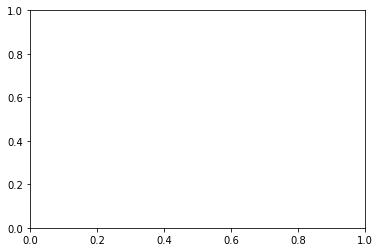

In [26]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()